# Important Code Blocks for working with the Python API

Richard Merino | merinogeospatial@gmail.com | richard.merino@raleighnc.gov


Content Manager reference material - https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#contentmanager

The blocks below can be use as building blocks to create scripts for creating automated processes. This notebook contains necessary blocks for extracting and backing up your feature layers. Can be written in time loop after authentication for persistently running script. Note that federated logins must use this authentication framework for now, username and password authentication not working for our type of login

For updating feature layers, refer to - https://developers.arcgis.com/python/guide/editing-features/

In [3]:
# IMPORT DEPENDENCIES
import arcgis
from arcgis.gis import GIS
from IPython.display import display
print ("Import Successful")

Import Successful


In [4]:
# AUTHENTICATE WITH OAUTH2
gis = GIS("https://ral.maps.arcgis.com", client_id='UXzZvlwDeph2dkcN')
print("Successfully logged in as: " + gis.properties.user.username)

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ral.maps.arcgis.com/sharing/rest/oauth2/authorize?client_id=UXzZvlwDeph2dkcN&response_type=code&expiration=-1&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob
Enter code obtained on signing in using SAML: ········
Successfully logged in as: richard.merino@raleighnc.gov_ral


In [5]:
type(gis.content) # check content manager, unnecessary

arcgis.gis.ContentManager

In [6]:
# CREATE CONTENT QUERY, RETURNS LIST OF OBJECTS
search_result = gis.content.search(query="owner:richard.merino@raleighnc.gov_ral", item_type="Feature Layer")
search_result

[<Item title:"Public Art Installations" type:Feature Layer Collection owner:richard.merino@raleighnc.gov_ral>,
 <Item title:"Tree_subset(TEST)" type:Feature Layer Collection owner:richard.merino@raleighnc.gov_ral>]

<Item title:"Public Art Installations" type:Feature Layer Collection owner:richard.merino@raleighnc.gov_ral>

<Item title:"Tree_subset(TEST)" type:Feature Layer Collection owner:richard.merino@raleighnc.gov_ral>
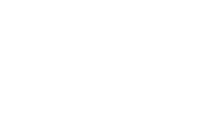

In [7]:
# DISPLAYS SEARCH RESULTS 
from IPython.display import display
for item in search_result:
    display(item)

# Item objects are to be called by Item ID

In [8]:
# GET ITEM ID
tree_data = search_result[1]
tree_data_id = tree_data.id
print(tree_data_id)

207450656b6641618994413617fdcbb5


In [20]:
"""# PUTTING ALL IDs FROM QUERY INTO LIST
item_id_list = []
for i in search_result:
    item_id_list.append(gis.content.get(str(i.id)))
print(item_id_list)"""

# GETTING ID IS UNNCESSARY - PULL STRAIGHT FROM OBJECT LIST
for i in search_result:
    i.download(save_path='C:\\Users\\merinor\\Documents\\Data')
print ("Items saved in specified location")
    

Items saved in specified location


<Item title:"Tree_subset(TEST)" type:Feature Layer Collection owner:richard.merino@raleighnc.gov_ral>
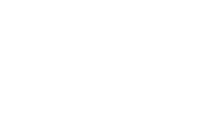

In [7]:
# SET VARIABLE TO ACCESS SPECIFIED ITEM
get_item = gis.content.get('207450656b6641618994413617fdcbb5')
get_item

In [8]:
# RETURNS JSON FORMAT METADATA - NO SPATIAL DATA INCLUDED, DO NOT USE TO BACKUP
data = get_item.get_data()
data

{'layers': [{'id': 0,
   'layerDefinition': {'defaultVisibility': True},
   'popupInfo': {'description': None,
    'fieldInfos': [{'fieldName': 'FID',
      'isEditable': False,
      'label': 'FID',
      'stringFieldOption': 'textbox',
      'tooltip': '',
      'visible': False},
     {'fieldName': 'ROUTE',
      'isEditable': True,
      'label': 'ROUTE',
      'stringFieldOption': 'textbox',
      'tooltip': '',
      'visible': True},
     {'fieldName': 'UNIQUE_ID',
      'format': {'digitSeparator': True, 'places': 0},
      'isEditable': True,
      'label': 'UNIQUE_ID',
      'stringFieldOption': 'textbox',
      'tooltip': '',
      'visible': True},
     {'fieldName': 'XCO',
      'format': {'digitSeparator': True, 'places': 2},
      'isEditable': True,
      'label': 'XCO',
      'stringFieldOption': 'textbox',
      'tooltip': '',
      'visible': True},
     {'fieldName': 'YCO',
      'format': {'digitSeparator': True, 'places': 2},
      'isEditable': True,
      'label

In [9]:
# WRITE METADATA TO JSON
import json
with open('data.json', 'w') as file:
  json.dump(data, file, ensure_ascii=False)
print ("JSON Backup created in location of this notebook") 
# Does not contain spatial data > find way to export geojson

JSON Backup created in location of this notebook


In [17]:
# DOWNLOADS ITEM TO PATH (DOES NOT CHANGE FORMAT)
get_item.download(save_path='C:\\Users\\Richard\\Desktop\\DATA')
print ("Item saved in specified location")

Item saved in location of this notebook


In [20]:
#EXPORTS SPECIFIED ITEM TO SPECIFIED FORMAT - WILL SAVE IN YOUR AGOL CONTENTS LOCATION
get_item.export('Tree_subset(TEST)', 'GeoJson', parameters=None, wait=True)

<Item title:"Tree_subset(TEST)" type:GeoJson owner:richard.merino@raleighnc.gov_ral>

In [23]:
search_result2 = gis.content.search(query="owner:richard.merino@raleighnc.gov_ral", item_type="GeoJSON")
search_result2

[<Item title:"Tree_subset(TEST)" type:GeoJson owner:richard.merino@raleighnc.gov_ral>]